Introduction to Image Processing - Segmenting Images
<html>
    <summary></summary>
         <div> <p></p> </div>
         <div style="font-size: 20px; width: 800px;"> 
              <h1>
               <left>Basic Image Manipulation in Python</left>
              </h1>
              <p><left>============================================================================</left> </p>
<pre>Course: UQ-Bio 2024
Instructor: Luis Aguilera
Authors: Luis Aguilera, Will Raymond, Brian Munsky
Contact Info: luis.aguilera@colostate.edu
</pre>
         </div>
    </p>

</html>

<details>
  <summary>Copyright info</summary>

```
Copyright 2024 Brian Munsky

Redistribution and use in source and binary forms, with or without modification, are permitted provided that the following conditions are met:

1. Redistributions of source code must retain the above copyright notice, this list of conditions and the following disclaimer.

2. Redistributions in binary form must reproduce the above copyright notice, this list of conditions and the following disclaimer in the documentation and/or other materials provided with the distribution.

3. Neither the name of the copyright holder nor the names of its contributors may be used to endorse or promote products derived from this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS" AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT HOLDER OR CONTRIBUTORS BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.
```
<details>



# Abstract

In this notebook, we will talk about single-cell segmentation and spot detection using Python. By now, we have covered basic image manipulation (see Module 2A). Here, our goal is introduce the basics of single-cell segmentation and particle detection.

## List of objectives

1. Understand and explain the more common methods used to segment cells from microscope images.
2. Understand and explain what a ***segmentation mask is***.
3. Understand and explain segmentation methods based on **threshold selection**.
4. Perform single-cell segmentation using **machine learning** based methods.
5. Understand the basics of **particle detection**.

![alt text](FigsA/Module_1_3/Slide2.png)

## Cell segmentation and spot detection (Summary):

1.   Thresholding
2.   Binarization
3.   Labeling

![alt text](FigsA/Module_1_2/Slide2.png)

<img src= https://github.com/MunskyGroup/uqbio2022/raw/master/files/files_image_processing/module_1_2/images/Slide3.png alt="drawing" width="1200"/>

![alt text](FigsA/Module_1_2/Slide4.png)

### Do it by hand
Using software such as [ImageJ/FIJI](https://imagej.nih.gov/ij/), [Napari](https://napari.org) or even something like Microsoft Paint, one can manually outline cells. This is cumbersome and impractical for processing thousands of cells over time.

![alt text](FigsA/Module_1_2/Slide5.png)

Check out this tool ([makesense](https://www.makesense.ai)) to create your own masks.

You can find some images in the following [link](https://www.dropbox.com/s/d9my4cp2j3ven04/test_data_uqbio2022.zip?dl=0)

# Getting started with segmentation using thresholding


### Watershed Methods
The scikit-image library has an excellent tutorial on [watershed methods](https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_watershed.html). Popular tools that apply such methods to single cells are:
* [CellStar](http://cellstar-algorithm.org) (Matlab, Python, CellProfiler PlugIn)
* [FogBank](https://bmcbioinformatics.biomedcentral.com/articles/10.1186/s12859-014-0431-x#additional-information) (Matlab)

![alt text](FigsA/Module_1_2/Slide6.png)

In [ ]:
# %pip install --upgrade  cellpose
# os.environ['PYDEVD_DISABLE_FILE_VALIDATION'] = '1'
#from cellpose import plot, models
# Note -- your kernel may crash when running this cell. 
# If it does, just restart the kernel and run this cell again.

In [ ]:
# conda remove pytorch
# conda install pytorch
# pip uninstall cellpose
# pip install cellpose


In [1]:
# Loading libraries
import random                        # Library to generate random numbers
import skimage                       # Library for image manipulation
import numpy as np                   # Library for array manipulation
import urllib.request                # Library to download data
import matplotlib.pyplot as plt      # Library used for plotting
from skimage import io, measure               # Module from skimage
from skimage.io import imread        # Module from skimage to read images as numpy arrays
from skimage.filters import gaussian # Module working with a gaussian filter
import pathlib                              # Library to work with file paths
import os
%matplotlib inline

from ipywidgets import interactive, HBox, VBox, Layout
import ipywidgets as widgets

from skimage.morphology import binary_dilation
from skimage.segmentation import watershed
from skimage.draw import polygon
from skimage.measure import regionprops
from skimage.color import label2rgb
from skimage.filters import threshold_otsu
from skimage.morphology import binary_erosion
from skimage.morphology import binary_closing
from skimage.morphology import binary_opening
from skimage.morphology import disk
from skimage.morphology import remove_small_objects
from scipy import ndimage as ndi              # Distance Transform
from skimage.feature import peak_local_max    # Local maxima in a matrix
from skimage.segmentation import watershed    # Watershed algorithm
from skimage.filters import difference_of_gaussians

In [2]:
students = ['Daria', 'Wiktoria','Jinyi','Wei','Pilar','Camila','Jayden','Humberto',
'Jakini','Varvara','Kanniese','Kristi','Eliud','Nam','Lakshay','Margaret',
'Grace','Apurv','Yinfei','Samantha','Yingli','Rena','Emily','Pegah','Al-Bashir']

Let's get started by downloading a sample image of a cell and plotting it using `matplotlib`:


In [3]:
# Downloading a test image
urls = ['https://ndownloader.figshare.com/files/26751209']
print('Downloading file...')
figName = './image_cell.tif'
urllib.request.urlretrieve(urls[0], figName)
# Loading figure to the notebook
images = imread(figName)
print('File is downloaded and accessible in: ... ./image_cell.tif ')


File is downloaded and accessible in: ... ./image_cell.tif 


In [4]:
# How do we find the figure we just saved?  I.e., what is figName = './image_cell.tif'   
# What is our current working directory (cwd)?    #import os #os.getcwd()
print(f'Our cvw is : {os.getcwd()}')

# What is the absolute path to the file?  #import os #os.path.abspath(figName)
print(f'The absolute path to the file is : {os.path.abspath(figName)}')


Our cvw is : /Users/luisaguilera/Desktop/uqbio2024/Module2-ImageProcessing
The absolute path to the file is : /Users/luisaguilera/Desktop/uqbio2024/Module2-ImageProcessing/image_cell.tif


In [5]:
# Printing the shape of the image
print('Original image shape: ' , images.shape)  # [T,Y,X,C]

# Selecting a frame and a color channel
img = images[0,:,:,0]
print('Single image shape: ' , img.shape)  # [Y,X]

Original image shape:  (35, 512, 512, 3)
Single image shape:  (512, 512)


In [6]:
# What is the difference  between images and img after the above code?
random.choice(students)

'Al-Bashir'

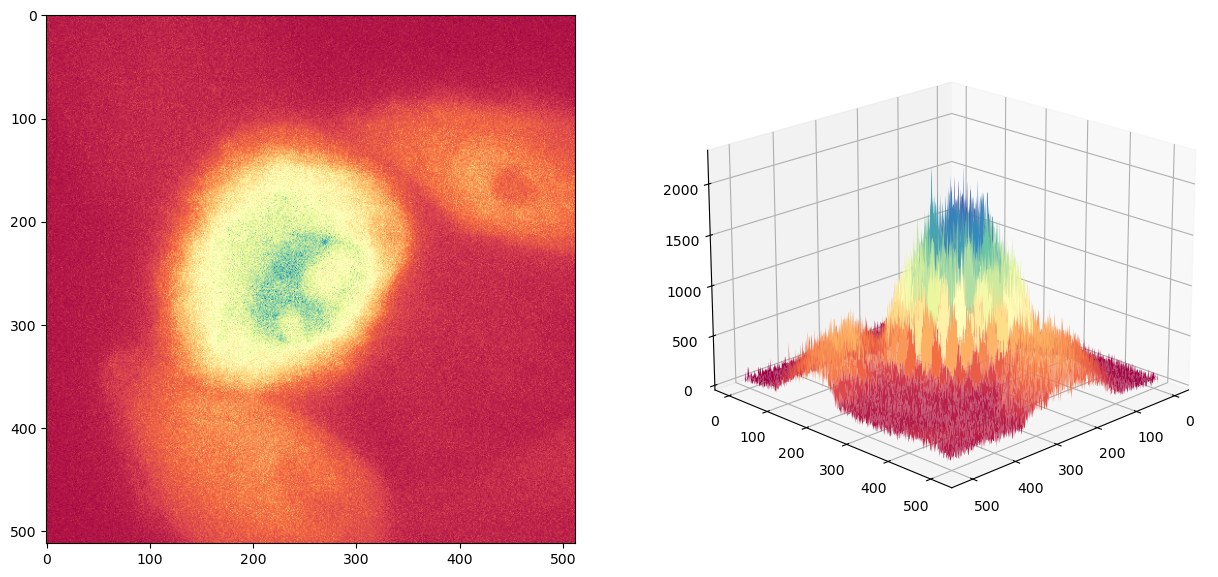

In [7]:
# Plotting the image as the 3d dimension figure.
space= np.arange(0, img.shape[0], 1)
xx, yy = np.meshgrid(space,space)
fig = plt.figure(figsize=(15,7))

# Set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1)
ax.imshow(img,cmap='Spectral') # Reds_r

# Set up the axes for the second plot
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot_surface(xx, yy , img,  rstride=20, cstride=20, shade=False, cmap='Spectral')
ax2.view_init(20, 45)
plt.show()

Recall when we plotted the histogram of the intensity pixels to get a sense of the distribution of pixel intensities throughout the image. Let's do that again here.

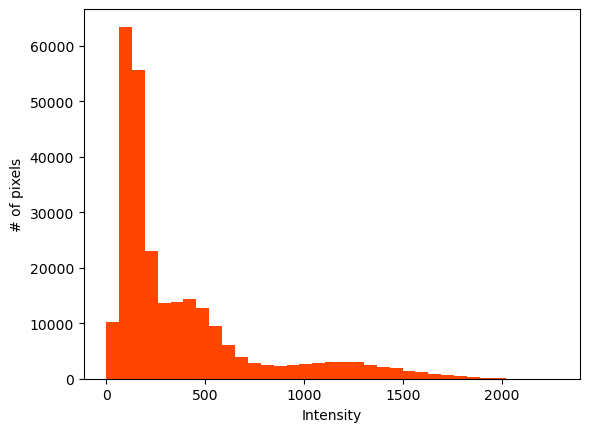

In [8]:
# Plotting the intensity distribution
f, ax = plt.subplots()
ax.hist(img.flatten(),color='orangered',bins=35)  # .ravel()
ax.set_xlabel('Intensity')
ax.set_ylabel('# of pixels')
plt.show()

In [9]:
# There are three peaks in the histogram. What do you think they represent?
random.choice(students)

'Emily'

## Segmentation based on threshold selection

Based on this image, we can guess a threshold of pixel intensities that are "cells" _versus_ "not cells". What do you think would make a good threshold?

In [10]:
random.choice(students)

'Rena'

In [11]:
# Thresholding the image
def viewer(threshold=50):
    test_image = img.copy()
    mask_image = np.zeros(img.shape)
    mask_image[test_image>threshold] = 255
    f,ax = plt.subplots()
    ax.imshow(mask_image, cmap='Greys')
    plt.show()

interactive_plot = interactive(viewer,threshold = widgets.IntSlider(min=0,max=2000,step=1,value=20,description='threshold'))       
controls = HBox(interactive_plot.children[:-1], layout = Layout(flex_flow='row wrap'))
output = interactive_plot.children[-1]

# Display the controls and output as an interactive widget
display(VBox([controls, output]))    

This mask image is useful, especially considering we simply took all of the pixels with a value bigger than `threshold`.

However, we know that the outside ought to be more smooth. Let's try applying a Gaussian filter to smooth out the mask image:


In [13]:
# Thresholding the image
def viewer(threshold=50, sigma=5):
    mask_image = np.zeros(img.shape)
    mask_image[img>threshold] = 255
    new_mask = gaussian(mask_image, sigma=sigma)
    f,ax = plt.subplots(1,2, figsize=(10,5))
    ax[0].imshow(mask_image, cmap='Spectral')
    ax[1].imshow(new_mask, cmap='Spectral')
    plt.show()
    return new_mask

interactive_plot = interactive(viewer, \
            threshold = widgets.IntSlider(min=0,max=1000,step=1,value=200,description='threshold'),\
            sigma = widgets.IntSlider(min=0,max=10,step=1,value=3,description='sigma'))       

controls = HBox(interactive_plot.children[:-1], layout = Layout(flex_flow='row wrap'))
output = interactive_plot.children[-1]

# Display the controls and output as an interactive widget
display(VBox([controls, output]))    

# select 226 and 3

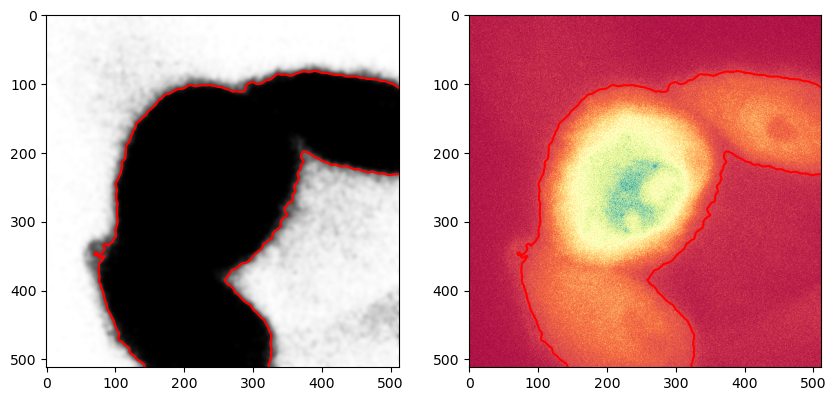

In [14]:
# Plotting all contours detected in the filtered image
new_mask = interactive_plot.result
#new_mask = img.copy()
f,ax = plt.subplots(1,2, figsize=(10,5))
contours = measure.find_contours(new_mask, level=200 ) # level is half of 255 (ish). What happens if we change it?
contours_connected = np.vstack((contours))
# downsample the contours
contours_connected = contours_connected[::20] 
ax[0].imshow(new_mask, cmap='Greys')
ax[1].imshow(images[0,:,:,0], cmap='Spectral')
for contour in contours:
  ax[0].plot(contour[:,1],contour[:,0],color='r')  
  ax[1].plot(contour[:,1],contour[:,0],color='r')

In [15]:
# How would I learn how the function find_contours works?  
random.choice(students)

'Samantha'

So far so good. By setting `threshold=700` we were able to find the "main" cell in the image. But what happens when we want to get all three? Try lowering the threshold to  300 and running the code.

_it looks like a crab_ !


In the cell below, we will try to take the connected image below and use a [watershed algorithm](https://en.wikipedia.org/wiki/Watershed_(image_processing) to break it into 3 distinct cells.

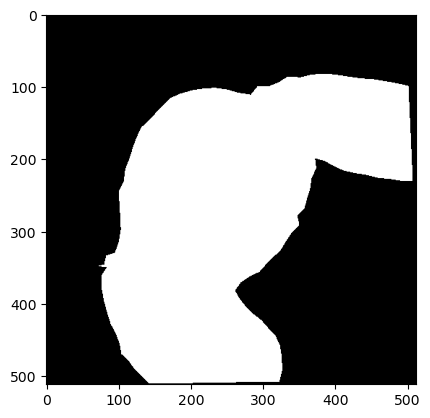

min value in mask:  0
max value in mask:  1


In [16]:
# make a new mask from the contours array
watershed_starting_mask = np.zeros(img.shape).astype(int)                    # Pre-allocating an array with zeros. Notice the datatype.
rr, cc = polygon(contours_connected[:,0], contours_connected[:,1])           # Returns the coordinates inside the contour
watershed_starting_mask[rr,cc] = 1                                           # Replacing all values inside the contour with ones.

# Plotting the mask
f,ax = plt.subplots()
ax.imshow(watershed_starting_mask, cmap='Greys_r')
plt.show()

# Printing the minimum and maximum values in the image
print('min value in mask: ', np.min(watershed_starting_mask) )
print('max value in mask: ', np.max(watershed_starting_mask) )

To find more information about the specific method use

```
help(watershed)
```



### Distance transform



"The distance transform computes the distance between each pixel and the nearest zero/nonzero pixel." An example with code implementation is accessible in this [link](https://www.youtube.com/watch?v=oxWfLTQoC5A).

For more infromation about the distance transform check this [link](https://homepages.inf.ed.ac.uk/rbf/HIPR2/distance.htm)

<picture>
    <source media="(prefers-color-scheme: light)" srcset="https://homepages.inf.ed.ac.uk/rbf/HIPR2/figs/distance.gif">
    <img src= https://homepages.inf.ed.ac.uk/rbf/HIPR2/figs/distance.gif alt="drawing" width="600"/>
</picture>


By  using the distance transform we can find basins in the center of each cell.

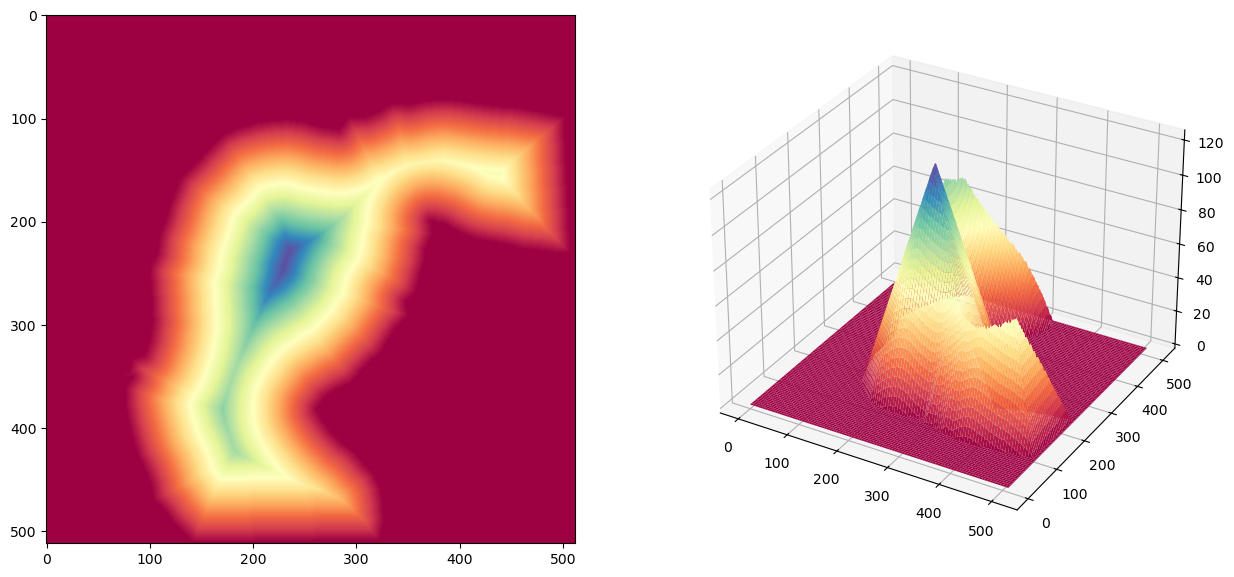

In [17]:
# Computes the Distance Transform distance in the image
distance = ndi.distance_transform_edt(watershed_starting_mask)

# Plotting the image as the 3d dimension figure.
space= np.arange(0, distance.shape[0], 1)
xx, yy = np.meshgrid(space,space)
fig = plt.figure(figsize=(15,7))
# Set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1)
ax.imshow(distance,cmap='Spectral') # Reds_r
# Set up the axes for the second plot
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot_surface(xx, yy , distance,  rstride=5, cstride=5, shade=False, cmap='Spectral')
#ax2.view_init(30, 45)
plt.show()

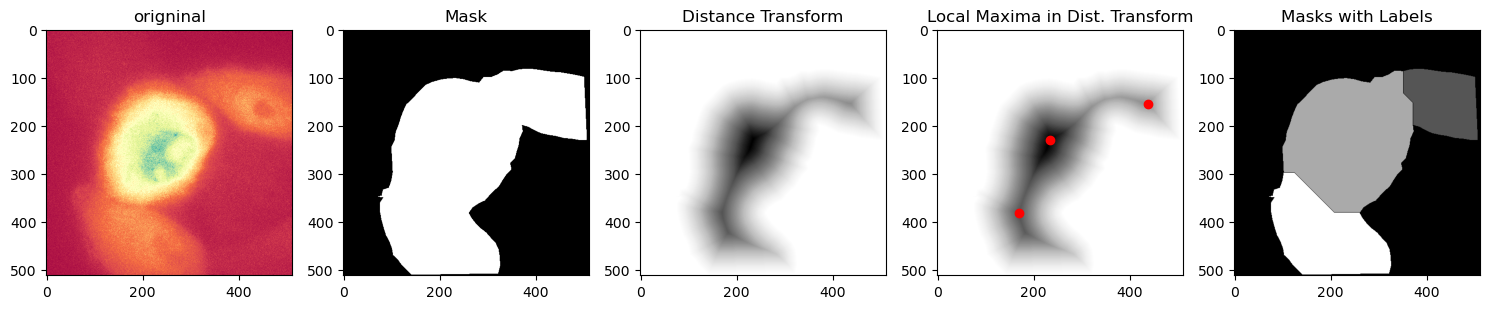

In [18]:
# Apply watershed
# Compute the Distance Transform distance in the image
distance = ndi.distance_transform_edt(watershed_starting_mask)                       # Computes the Distance Transform distance in the image

# Use the Distance transform image to find local maxima
coords = peak_local_max(distance, min_distance=50, labels=watershed_starting_mask)  

 # Selecting unique indexes
_,inds = np.unique(distance[coords[:,0],coords[:,1]],return_index=True)      # Make sure they are unique
coords = coords[inds,:]                                                     

# Create a mask associated with the local maxima
mask = np.zeros(distance.shape, dtype=bool)        # Pre-allocating an array with zeros
mask[tuple(coords.T)] = True                       # Make an image with 1's where local maxima are
markers, _ = ndi.label(mask)                       # Unique values used as the desired labels

# Using the watershed algorithm
labels = watershed(-distance, markers, mask=watershed_starting_mask, watershed_line=True)  
#Why do we need to use the negative of the distance matrix?

# Plot the results
f,ax = plt.subplots(1,5, figsize=(15,7))
ax[0].imshow(img, cmap='Spectral')
ax[0].set_title('origninal')
ax[1].imshow(watershed_starting_mask, cmap='Greys_r')
ax[1].set_title('Mask')
ax[2].imshow(ndi.distance_transform_edt(watershed_starting_mask), cmap='Greys')
ax[2].set_title('Distance Transform')
ax[3].imshow(ndi.distance_transform_edt(watershed_starting_mask), cmap='Greys')
ax[3].scatter(coords[:,1],coords[:,0],c='r')
ax[3].set_title('Local Maxima in Dist. Transform')
ax[4].imshow(labels, cmap='gray') #Spectral
ax[4].set_title('Masks with Labels')
f.tight_layout()

# The concept of **Masks** and labels

The shape of our image is (35, 512, 512, 3)
The shape of our labels is (512, 512)


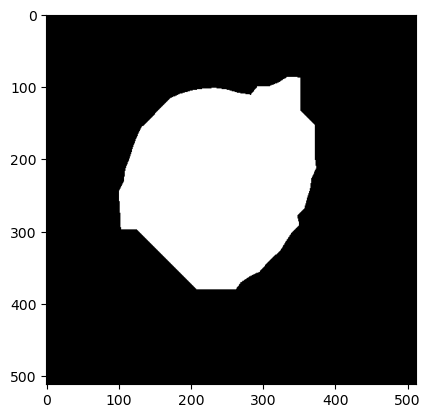

In [30]:
# How would I show an image of just the first cell?
# Remember,
print(f'The shape of our image is {images.shape}')
print(f'The shape of our labels is {labels.shape}')
random.choice(students)

# How should I change this?
plt.imshow((labels==2), cmap='gray')

# Machine Learning Methods






In recent years, deep learning methods have rapidly improved the state-of-the-art for cell segmentation methods. We will come back to the theory on this topic - for now, we will demonstrate a couple of ML-based tools that can be used to segment images. If you are keen to get started learning about how the popular U-Net model works, check out [this video](https://www.youtube.com/watch?v=azM57JuQpQI) and/or [this video](https://www.youtube.com/watch?v=4ZZjr6SFBV8).



## Cellpose

The [CellPose](https://www.nature.com/articles/s41592-020-01018-x) algorithm uses a [U-Net approach](https://arxiv.org/pdf/1505.04597.pdf), but is a generalist algorithm that can work with a wide variety of cell types.

![alt text](FigsA/Module_1_2/Slide8.png)

One of the biggest problems in single-cell segmentation is that large data sets are needed to train machine-learning algorithms, but a relatively limited number of single-cell images are available for training.

![alt text](FigsA/Module_1_2/Slide9.png)
![alt text](FigsA/Module_1_2/Slide10.png)
![alt text](FigsA/Module_1_2/Slide11.png)
![alt text](FigsA/Module_1_2/Slide12.png)


### Segmenting a complete cell using Cellpose

In [32]:
# %pip install --upgrade  cellpose
# os.environ['PYDEVD_DISABLE_FILE_VALIDATION'] = '1'
from cellpose import plot, models
# Note -- your kernel may crash when running this cell. 
# If it does, just restart the kernel and run this cell again.

image shape:  (35, 512, 512, 3)


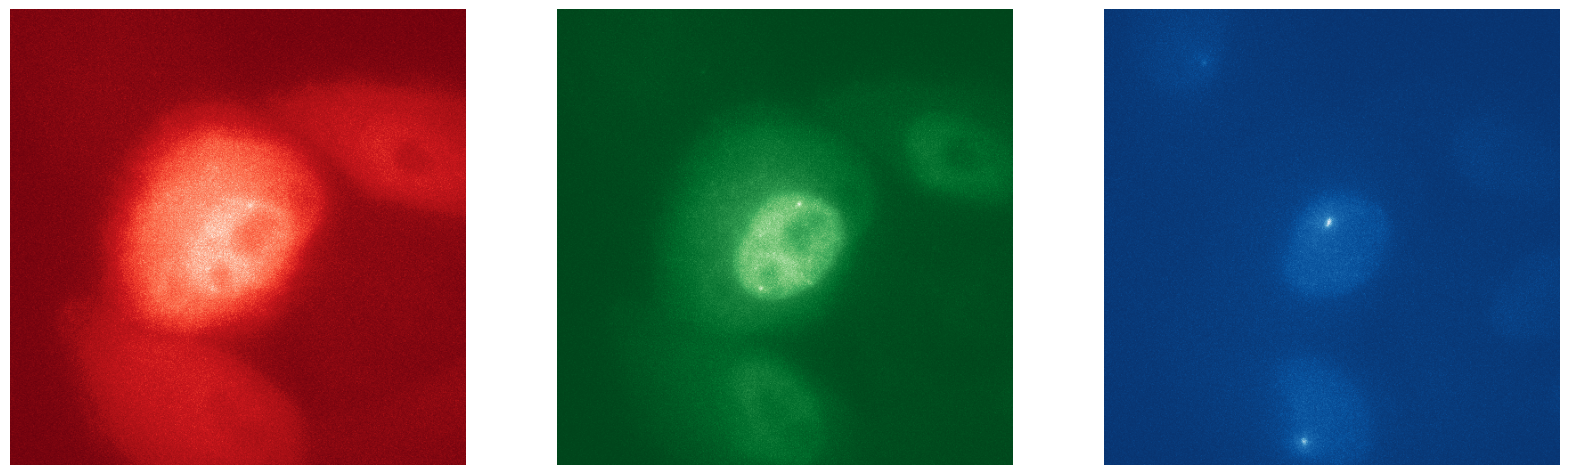

In [31]:
# Downloading test image

# Hela Cells. Linda's Publication.
urls = ['https://ndownloader.figshare.com/files/26751209']
urllib.request.urlretrieve(urls[0], './image_cell.tif')
figName = './image_cell.tif'
image_complete = imread(figName)

print('image shape: ', image_complete.shape)

# Plotting each one of the 3 colors independently
fig, ax = plt.subplots(1,3, figsize=(20, 7))
ax[0].imshow(image_complete[0,:,:,0],cmap='Reds_r')
ax[1].imshow(image_complete[0,:,:,1],cmap='Greens_r')
ax[2].imshow(image_complete[0,:,:,2],cmap='Blues_r')
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')
plt.show()

In [33]:
img = image_complete[0,:,:,0]

In [35]:
# RUN CELLPOSE
model = models.Cellpose(model_type='cyto') # model_type='cyto' or model_type='nuclei'
masks  = model.eval(img, diameter=200)[0]


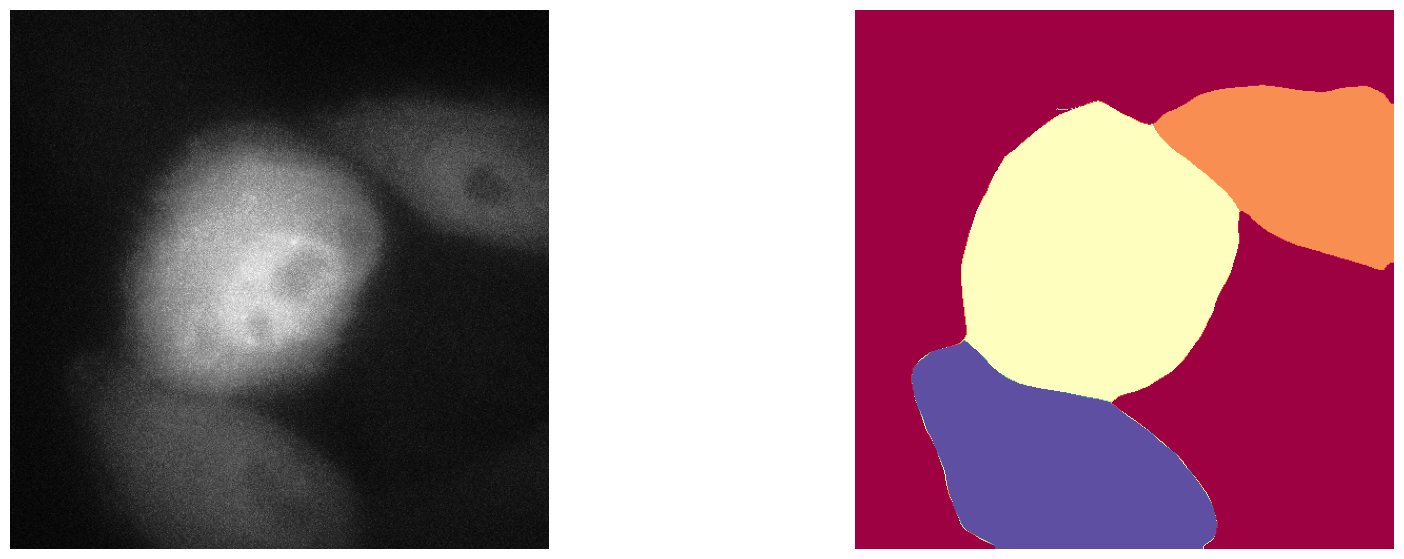

Values in mask:  [0 1 2 3 4]


In [36]:
# Plotting each one of the 3 colors independently
fig, ax = plt.subplots(1,2, figsize=(20, 7))
ax[0].imshow(img,cmap='Greys_r')
ax[1].imshow(masks,cmap='Spectral')
ax[0].axis('off')
ax[1].axis('off')
plt.show()
print('Values in mask: ', np.unique (masks))

In [ ]:
# Let's see what evaluation information we can get from our model
#help(model.eval)

# Segmenting nuclei and cytosol

In [37]:
# Downloading Fluorescence In Situ Hybridization (FISH) data
urls = ['https://github.com/MunskyGroup/FISH_Processing/raw/main/dataBases/example_data/ROI002_XY1620755646_Z00_T0_merged.tif']
print('Downloading file...')
urllib.request.urlretrieve(urls[0], './ROI001_XY1620755243_Z00_T0_merged.tif')
figName = './ROI001_XY1620755243_Z00_T0_merged.tif'
images_FISH = imread(figName)

# The image has the following dimensions [Z,Y,X,C]
print('The image has the following dimensions [Z,Y,X,C]: ' ,images_FISH.shape)

# For segmentation, we will select the central  slice.
image_to_segment= images_FISH[10,:,:,:]


The image has the following dimensions [Z,Y,X,C]:  (23, 928, 624, 3)


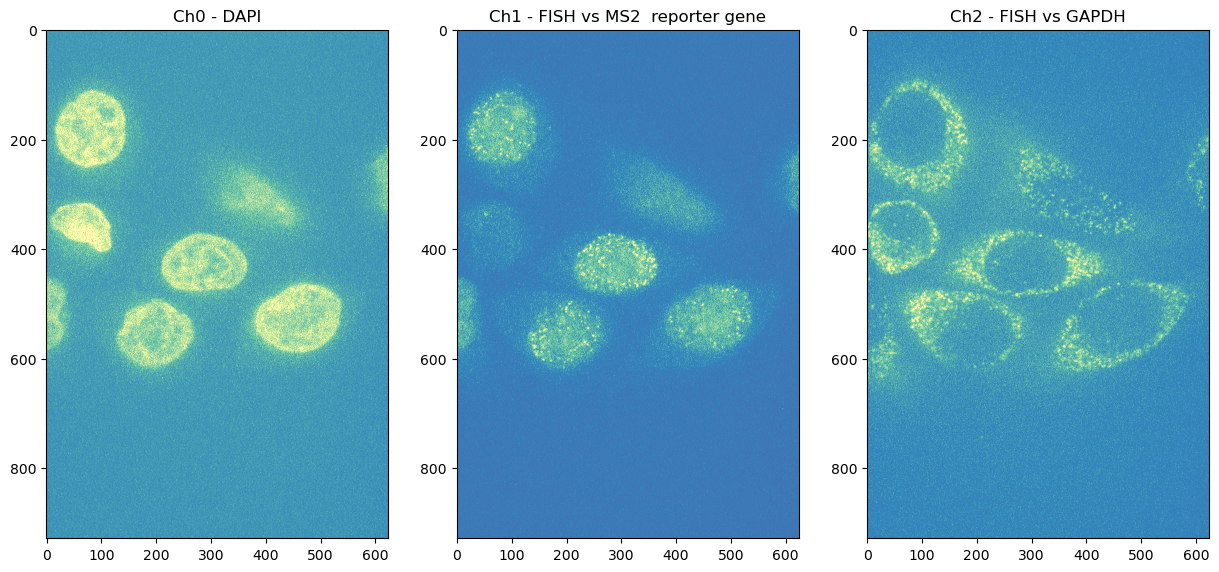

In [38]:
fig, ax = plt.subplots(1,3, figsize=(15, 8))
zSlice = 10
ax[0].imshow(images_FISH[zSlice,:,:,0],cmap='Spectral_r')
ax[0].set(title='Ch0 - DAPI')
ax[1].imshow(images_FISH[zSlice,:,:,1],cmap='Spectral_r')
ax[1].set(title= 'Ch1 - FISH vs MS2  reporter gene' )
ax[2].imshow(images_FISH[zSlice,:,:,2],cmap='Spectral_r')
ax[2].set(title= 'Ch2 - FISH vs GAPDH' )
plt.show()

In [39]:
#model.eval?

(928, 624, 2)
number of detected cells:  8


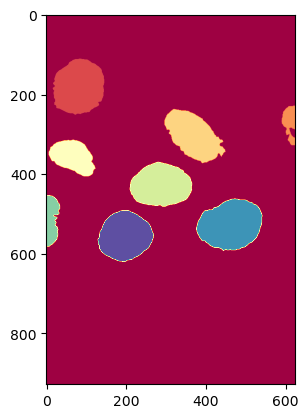

In [40]:
# Segmenting the nuclei
img_nuc = images_FISH[zSlice,:,:,0:2]
print(img_nuc.shape)
use_GPU = False  # Set to True if you have a GPU - this will make it MUCH faster.
model = models.Cellpose(gpu=use_GPU, model_type='nuclei') # model_type='cyto' or model_type='nuclei'
masks_nuc = model.eval(img_nuc, diameter=100, channels=[0,1])[0]
print('number of detected cells: ', np.max(masks_nuc))
plt.imshow(masks_nuc,cmap='Spectral')
plt.show()

(928, 624, 3)


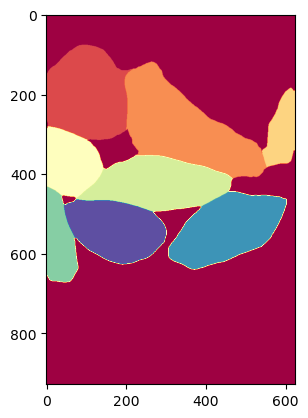

In [41]:
# Segmenting the cytosol
img_cyto = images_FISH[zSlice,:,:,0:3]
print(img_cyto.shape)
use_GPU = False
model = models.Cellpose(gpu=use_GPU, model_type='cyto2') # model_type='cyto', 'cyto2' or model_type='nuclei'
masks_cyto, flows, styles, diams = model.eval(img_cyto, diameter=200, channels=[0,2])
plt.imshow(masks_cyto,cmap='Spectral')
plt.show()

In [ ]:
plt.imshow(masks_cyto==8)
plt.show()

### Calculating the area of each cell in the image

In [ ]:
# How could we access just the pixels forming a specific cell and find the cell area?
random.choice(students)

In [42]:
# calculate the area of each cell
cell_areas = []
for i in range(1, np.max(masks_cyto)+1):
    cell_areas.append(np.sum(masks_cyto==i))
print('The area of the first 5 cells is: ', cell_areas[:5])


The area of the first 5 cells is:  [39805, 52681, 10834, 19141, 36290]


In [45]:
# Associating each nucleus with its corresponding cytosol
nucleus_indices = np.zeros(np.max(masks_cyto)+1)
for i in range(1,np.max(masks_nuc)+1):
    posn_nucl = np.mean(np.where(masks_nuc==i),axis=1).astype(int)
    nucleus_indices[masks_cyto[posn_nucl[0],posn_nucl[1]]] = i

print(nucleus_indices)

[0. 1. 3. 2. 4. 5. 6. 7. 8.]


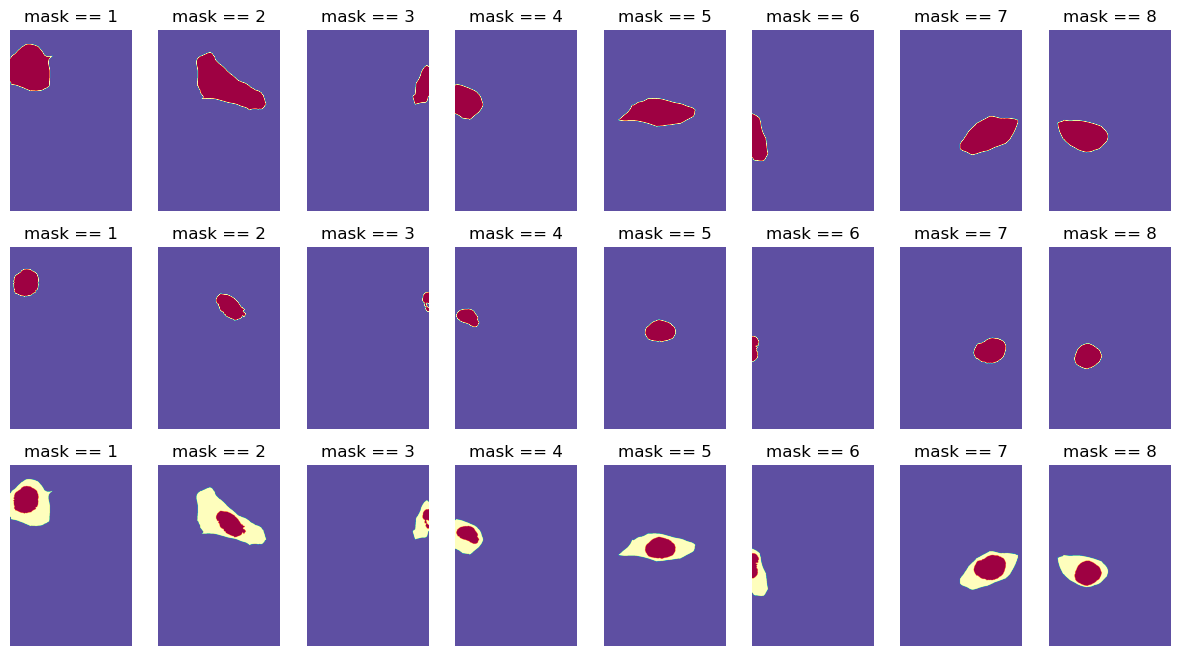

In [46]:
# Show the cytoplasms and corresponding nuclei
number_detected_cells = np.max(masks_cyto)

fig, ax = plt.subplots(3,number_detected_cells, figsize=(15, 8))
for i in range (1,number_detected_cells+1):
  selected_cyto_mask = masks_cyto==i
  ax[0,i-1].imshow(selected_cyto_mask,cmap='Spectral_r')
  ax[0,i-1].set(title='mask == ' + str(i) )
  ax[0,i-1].axis('off')

  # find which nucleus is associated with the cytosol
  selected_nuc_mask = masks_nuc==nucleus_indices[i]
  ax[1,i-1].imshow(selected_nuc_mask,cmap='Spectral_r')
  ax[1,i-1].set(title='mask == ' + str(i) )
  ax[1,i-1].axis('off')

  # find which nucleus is associated with the cytosol
  combined = selected_nuc_mask.astype(int) + selected_cyto_mask.astype(int)
  ax[2,i-1].imshow(combined,cmap='Spectral_r')
  ax[2,i-1].set(title='mask == ' + str(i) )
  ax[2,i-1].axis('off')
plt.show()

In [48]:
# Make a list of their areas.
list_cyt_areas = []
list_nuc_areas = []
for i in range (1,number_detected_cells+1):
  selected_cyto_mask = masks_cyto==i
  area_cyto = np.sum(selected_cyto_mask)
  list_cyt_areas.append(area_cyto)
  selected_nuc_mask = masks_nuc==nucleus_indices[i]
  area_nuc = np.sum(selected_nuc_mask)
  list_nuc_areas.append(area_nuc)
print(list_cyt_areas, list_nuc_areas)

[39805, 52681, 10834, 19141, 36290, 14205, 36793, 30182] [14176, 12327, 2100, 7151, 13179, 3441, 15973, 13013]


### Calculating the mean intensity of each cell in the image

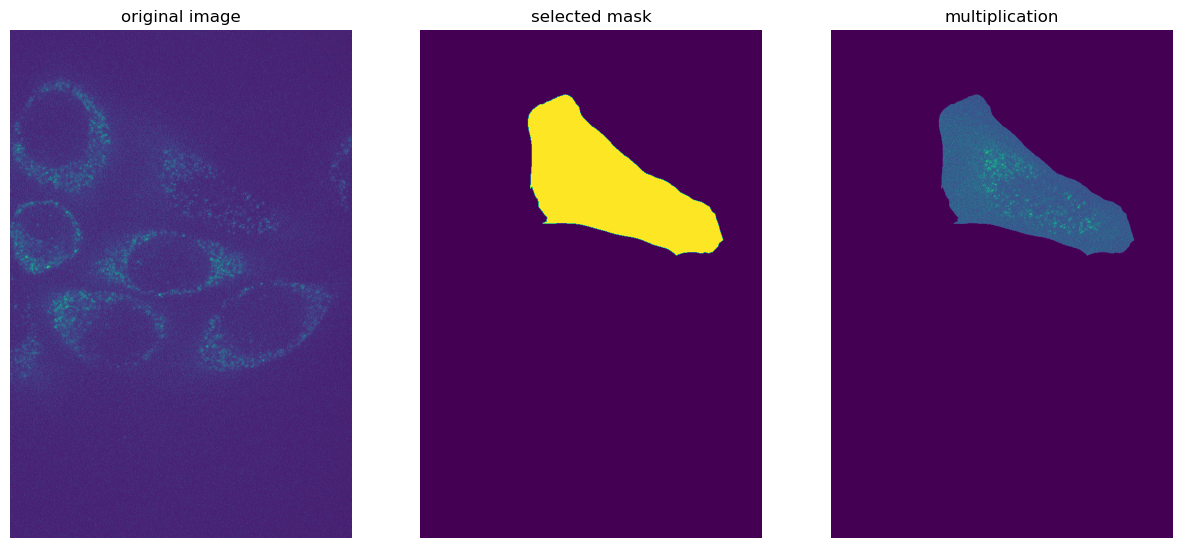

In [49]:
# Here is how we can select the pixels forming a cell, by multiplying the mask by the image
fig, ax = plt.subplots(1,3, figsize=(15, 8))

# show original image
ax[0].imshow(img_cyto[:,:,2])
ax[0].set(title='original image')

# select a mask
selected_cell_label = 2
selected_mask = masks_cyto == selected_cell_label  # Select other cell label

# show the mask
ax[1].imshow(selected_mask)
ax[1].set(title='selected mask')

# multiply the mask by the image and show that
ax[2].imshow(selected_mask*img_cyto[:,:,2])
ax[2].set(title='multiplication')

for i in range(len(ax)):
    ax[i].axis('off')

plt.show()

In [54]:
# Let' compute the mean intensity for each cell in the image.
list_mean_intensities = []
for iMask in range (1,number_detected_cells+1):
  selected_mask = masks_cyto==iMask
  mean_intensity = []
  for iColor in range(3):
    selected_color_image = selected_mask*img_cyto[:,:,iColor]
    mean_intensity.append(selected_color_image[np.nonzero(selected_color_image)].mean()) # this step is to avoid the 0 values!!!
  list_mean_intensities.append(mean_intensity)

# Convert the list to a pandas dataframe and display
import pandas as pd
df = pd.DataFrame(list_mean_intensities, columns=['Ch0', 'Ch1', 'Ch2'])
df

Ch0         Ch1         Ch2
0  698.058159  659.403869  759.201131
1  576.353581  570.380991  676.313206
2  564.586672  559.083072  621.238508
3  742.239695  569.632778  812.385037
4  669.372830  690.734059  771.902838
5  597.595072  598.152482  703.891728
6  704.699753  665.014432  712.268991
7  677.217613  671.296833  774.120535

# Spot detection

___

## Spot detection: filtering -> thresholding -> binarization -> labeling

/var/folders/gf/7hpbk6d91lv4z0gx_z77vljh0000gn/T/ipykernel_8501/2674694087.py:23: RuntimeWarning: divide by zero encountered in log10
  ax[1,1].plot(survival, np.log10(np.arange(len(survival))))


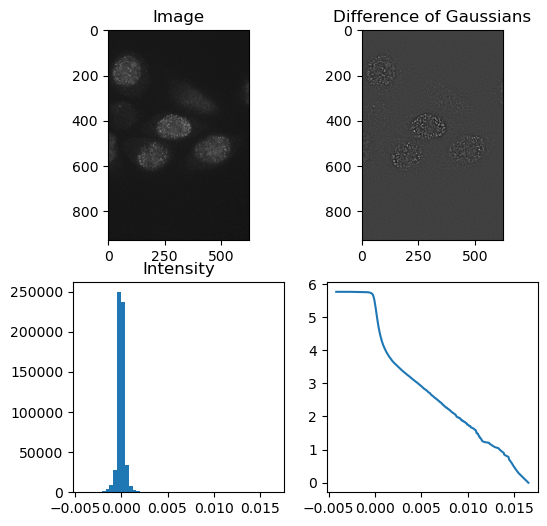

intensity range:  -0.004176958905956665 0.016580984698187026


In [50]:
# Selecting the color channel with RNA spots
zSlice = 10
iChannel = 1
img_spots = images_FISH[zSlice,:,:,iChannel]

# Show the original image
fig, ax = plt.subplots(2,2, figsize=(6, 6))
ax[0,0].imshow(img_spots,cmap='Greys_r')
ax[0,0].set(title='Image')

# Apply a difference of Gaussians filter to the image to enhance spots
img_spots_filtered = difference_of_gaussians(img_spots,low_sigma=1, high_sigma=5)
ax[0,1].imshow(img_spots_filtered,cmap='Greys_r')
ax[0,1].set(title= 'Difference of Gaussians' )

# Make a histogram of the intensity values
ax[1,0].hist(img_spots_filtered.flatten(),bins=50)
ax[1,0].set(title= 'Intensity' )

# Make a survival plot of the intensity values
survival = np.sort(img_spots_filtered.flatten())
survival = survival[::-1]
ax[1,1].plot(survival, np.log10(np.arange(len(survival))))

plt.show()
print('intensity range: ', np.min(img_spots_filtered), np.max(img_spots_filtered))

In [51]:
threshold = 0.0055

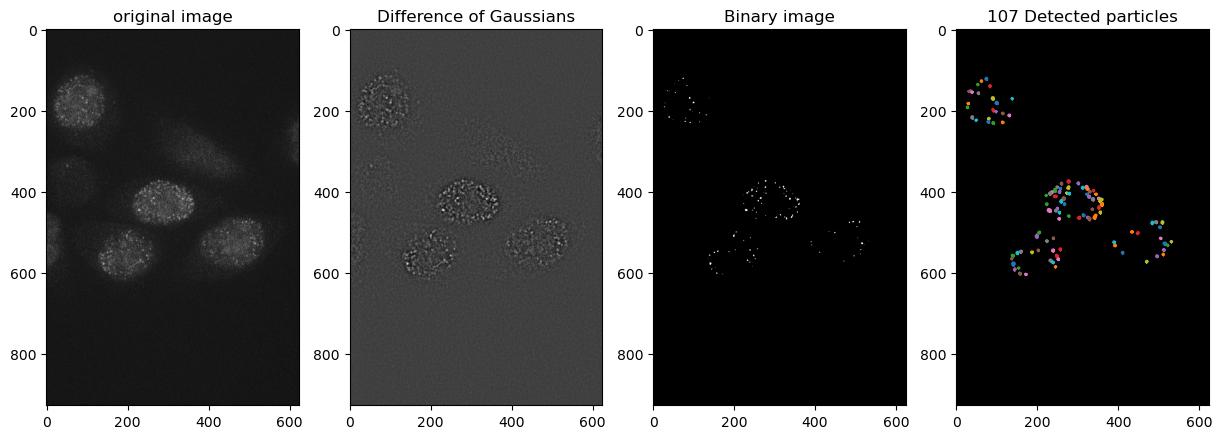

In [52]:
# Show original image in MS2 channel
fig, ax = plt.subplots(1,4, figsize=(15, 6))
ax[0].imshow(img_spots,cmap='Greys_r')
ax[0].set(title='original image')

# Apply a difference of Gaussians filter to the image to enhance spots
ax[1].imshow(img_spots_filtered,cmap='Greys_r')
ax[1].set(title= 'Difference of Gaussians' )

# Apply a Threshold to the image to create binary image
img_spots_binary = img_spots_filtered.copy()
img_spots_binary[img_spots_binary>=threshold] = threshold # Making spots above the threshold equal to the threshold value.
img_spots_binary[img_spots_binary<threshold] = 0 # Making spots below the threshold equal to 0.
ax[2].imshow(img_spots_binary,cmap='Greys_r')
ax[2].set(title= 'Binary image' )

# Image binarization
img_spots_binary[img_spots_binary!=0] = 1 # Binarization
ax[3].imshow(img_spots_binary, cmap=plt.cm.gray)

# Labeling. Joining pixels in "particles"
spot_contours = measure.find_contours(img_spots_binary, 0.5)
for contour in spot_contours:
    ax[3].plot(contour[:, 1], contour[:, 0], linewidth=2)
ax[3].set(title= str(len(spot_contours))+' Detected particles' )
plt.show()

In [55]:
# Counting the detected particles in each cell

list_cytosol_particles = np.zeros(number_detected_cells)
list_nuclear_particles = np.zeros(number_detected_cells)

# Loop through the cytosol masks
for i in range(len(spot_contours)):
    # Find the position of the particle
    posn = np.mean(spot_contours[i], axis=0).astype(int)

    # Check which cyto mask is the particle in
    cell_num = masks_cyto[posn[0], posn[1]]
    if cell_num>0:
        list_cytosol_particles[cell_num-1] += 1

        # Check if the particle is also in the nucleus
        if masks_nuc[posn[0], posn[1]] == nucleus_indices[cell_num]:
            list_nuclear_particles[cell_num-1] += 1

# Add the number of particles to the dataframe
df['Particles in cytosol'] = list_cytosol_particles
df['Particles in nucleus'] = list_nuclear_particles
df

Ch0         Ch1         Ch2  Particles in cytosol  \
0  698.058159  659.403869  759.201131                  23.0   
1  576.353581  570.380991  676.313206                   0.0   
2  564.586672  559.083072  621.238508                   0.0   
3  742.239695  569.632778  812.385037                   0.0   
4  669.372830  690.734059  771.902838                  44.0   
5  597.595072  598.152482  703.891728                   0.0   
6  704.699753  665.014432  712.268991                  17.0   
7  677.217613  671.296833  774.120535                  23.0   

   Particles in nucleus  
0                  23.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                  44.0  
5                   0.0  
6                  17.0  
7                  23.0

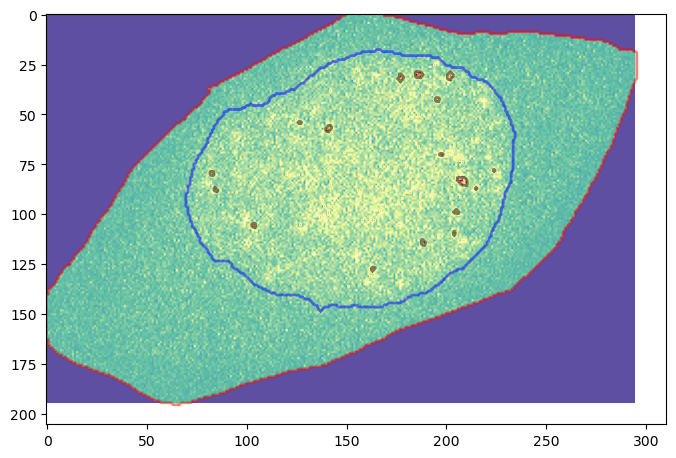

In [56]:
# Let's now look at individual cells in the image

cell_num = 7 # Choose which cell to look at
selected_cyto_mask = masks_cyto==cell_num
selected_nuc_mask = masks_nuc==nucleus_indices[cell_num]

# Crop the original image to show just the selected cell
image_cropped = img_cyto.copy()
image_cropped[~selected_cyto_mask] = 0

# remove rows and columns that are all zeros
rows = np.any(image_cropped[:,:,0], axis=1)
rlims = [np.min(np.where(rows)), np.max(np.where(rows))]
cols = np.any(image_cropped[:,:,0,], axis=0)
clims = [np.min(np.where(cols)), np.max(np.where(cols))]
image_cropped = image_cropped[rlims[0]:rlims[1], clims[0]:clims[1], :]

# display the cropped image
fig, ax = plt.subplots(1,1, figsize=(8, 8))
ax.imshow(image_cropped[:,:,1],cmap='Spectral_r')

# draw the contours of the cytosol and nucleus
cyto_contours = measure.find_contours(selected_cyto_mask, 0.5)
nuc_contours = measure.find_contours(selected_nuc_mask, 0.5)
for contour in cyto_contours:
    ax.plot(contour[:, 1]-clims[0], contour[:, 0]-rlims[0], linewidth=2, color='r', alpha=0.5)
for contour in nuc_contours:
    ax.plot(contour[:, 1]-clims[0], contour[:, 0]-rlims[0], linewidth=2, color='b', alpha=0.5)

# Add the contours of the particles to the image
for contour in spot_contours:
    # Check if the particle is in the selected cell
    posn = np.mean(contour, axis=0).astype(int)
    if selected_cyto_mask[posn[0], posn[1]]:
        ax.plot(contour[:, 1]-clims[0], contour[:, 0]-rlims[0], linewidth=2, color='k', alpha=0.5)


![alt text](FigsA/Module_1_3/Slide8.png)

In [58]:
# Installing libraries
#%pip install trackpy
import trackpy as tp # Library for particle tracking

In [59]:
# This section generates an histogram with the intensity of the detected particles in the image.
particle_size = 5 # according to the documentation must be an odd number 3,5,7,9 etc.
minimal_intensity_for_selection = 0 # minimal intensity to detect a particle.
# "spots_detected_dataframe" is a pandas data frame that contains the information about the detected spots
spots_detected_dataframe = tp.locate(img_spots, diameter=particle_size, minmass=minimal_intensity_for_selection)

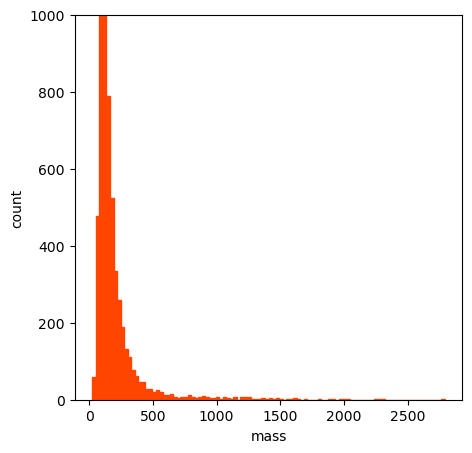

In [60]:
fig, ax = plt.subplots(1,1, figsize=(5, 5))
ax.hist(spots_detected_dataframe['mass'], bins=100, color = "orangered", ec="orangered")
ax.set(xlabel='mass', ylabel='count')
ax.set_ylim([0,1000])
plt.show()

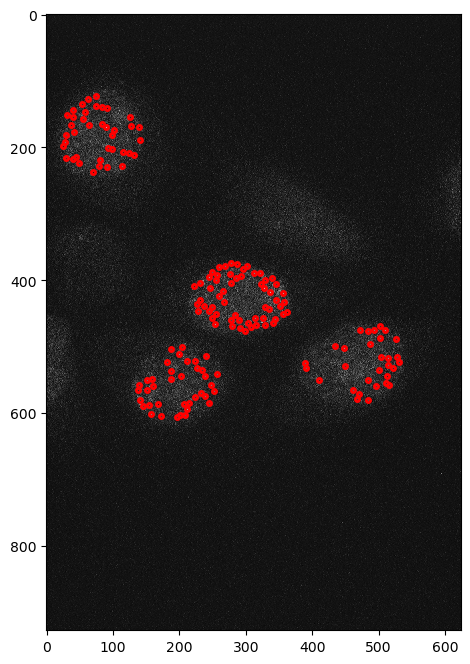

In [61]:
fig, ax = plt.subplots(1,1, figsize=(8, 8))
spots_detected_dataframe = tp.locate(img_spots,diameter=5, minmass=700) # "spots_detected_dataframe" is a pandas data frame that contains the information about the detected spots
tp.annotate(spots_detected_dataframe,img_spots,plot_style={'markersize': 3})  # tp.anotate is a trackpy function that displays the image with the detected spots
ax.axis('off')
plt.show()

In [62]:
spots_detected_dataframe.head()

y          x         mass      size       ecc      signal  \
759  121.966493  74.212687  1025.298307  1.242824  0.202133  164.002615   
795  126.822709  61.991633  1053.745000  1.185386  0.336913  192.878963   
850  135.038139  53.023466  1216.422848  1.165267  0.456605  236.462018   
866  137.668308  74.417056   834.254326  1.190559  0.614688  175.397405   
875  139.094325  82.973567  1365.378612  1.104266  0.162914  291.923223   

     raw_mass        ep  
759   16209.0  0.038516  
795   14624.0  0.046260  
850   13966.0  0.050473  
866   12992.0  0.058338  
875   16578.0  0.037071

In [ ]:
#help(tp.locate)

## Extracting information from a Pandas data frame using conditionals

In [63]:
# Showing information for particle with mass larger than >
min_mass = 200
spots_detected_dataframe.loc[spots_detected_dataframe['mass']>min_mass ]

y           x         mass      size       ecc      signal  \
759   121.966493   74.212687  1025.298307  1.242824  0.202133  164.002615   
795   126.822709   61.991633  1053.745000  1.185386  0.336913  192.878963   
850   135.038139   53.023466  1216.422848  1.165267  0.456605  236.462018   
866   137.668308   74.417056   834.254326  1.190559  0.614688  175.397405   
875   139.094325   82.973567  1365.378612  1.104266  0.162914  291.923223   
...          ...         ...          ...       ...       ...         ...   
3716  601.983761  157.081453  1413.884789  1.148276  0.407451  254.516448   
3724  602.900813  201.464009   830.799189  1.103329  0.233531  171.754294   
3725  602.894010  208.547861   841.146696  1.116616  0.189644  173.974175   
3733  604.148767  171.561154  1004.755462  1.272427  0.136866  142.824240   
3748  606.760936  196.085656   917.938446  1.198878  0.219631  174.520194   

      raw_mass        ep  
759    16209.0  0.038516  
795    14624.0  0.046260  
850    13966.0  0.050473  
866    12992.0  0.058338  
875    16578.0  0.037071  
...        ...       ...  
3716   17542.0  0.033762  
3724   13250.0  0.056026  
3725   13900.0  0.050939  
3733   14228.0  0.048707  
3748   13199.0  0.056468  

[166 rows x 8 columns]

In [66]:
# Showing information for particles smaller than a given size
min_size = 1.1
spots_detected_dataframe.loc[spots_detected_dataframe['size']<min_size]

y           x         mass      size       ecc      signal  \
928   146.663428   57.510974   831.971787  1.081970  0.308757  180.365282   
956   151.960615   30.955810  1082.487080  1.058590  0.422452  250.336270   
971   153.848539   39.272690  1017.680894  1.065807  0.447764  256.494648   
972   154.239005  125.774528   743.454056  1.067150  0.123308  170.563794   
1040  164.684879   84.025241   997.567704  1.090095  0.338230  195.788080   
1089  173.321322  101.220507   738.271352  1.042834  0.216911  180.875497   
1141  181.839644   29.236292  1097.542882  1.017880  0.504523  286.695763   
1417  228.779383  113.932562  1251.923032  1.069793  0.151644  270.619532   
2435  397.037801  339.170130   874.489658  1.063041  0.374703  190.605376   
2557  416.846961  264.902602  2787.596904  1.085813  0.263026  586.612346   
2668  433.499268  266.797200   776.071976  1.094043  0.321047  183.757761   
2672  435.260781  226.197780   943.404412  1.085246  0.258454  231.055535   
2699  439.158973  236.966119  1099.315206  1.079396  0.372194  231.941697   
2830  460.308789  289.988979   703.361942  1.073290  0.182617  165.712281   
2884  469.232689  501.857817   906.928555  1.075909  0.290577  197.175505   
3057  496.868242  486.875926   714.076446  1.090588  0.256938  173.311791   
3212  522.179391  211.941465   869.960386  1.048048  0.273912  181.493125   
3213  521.871772  223.016876  1373.721066  1.080382  0.243481  305.842231   
3219  523.074061  181.600559   787.771104  1.097861  0.238163  161.782735   
3339  541.982025  256.961457  1256.881958  1.091357  0.271952  247.749393   
3392  550.128159  483.700090   913.767219  1.063144  0.323821  201.140856   
3576  579.174298  467.230317   768.893170  1.012765  0.259790  199.091047   
3647  590.085434  145.345094   791.557432  1.093941  0.435474  190.166770   

      raw_mass        ep  
928    14809.0  0.045199  
956    14266.0  0.048461  
971    15334.0  0.042438  
972    12915.0  0.059066  
1040   15628.0  0.041034  
1089   14638.0  0.046178  
1141   16044.0  0.039199  
1417   16953.0  0.035709  
2435   15055.0  0.043862  
2557   25242.0  0.019710  
2668   14055.0  0.049859  
2672   14786.0  0.045328  
2699   16332.0  0.038022  
2830   15195.0  0.043135  
2884   12582.0  0.062433  
3057   13664.0  0.052675  
3212   14905.0  0.044668  
3213   15336.0  0.042428  
3219   12839.0  0.059802  
3339   15357.0  0.042324  
3392   14956.0  0.044390  
3576   14278.0  0.048384  
3647   16079.0  0.039052

In [67]:
# Extracting the y values for all particles
spots_detected_dataframe.y.values[0:10]

array([121.96649323, 126.82270943, 135.03813946, 137.66830828,
       139.09432466, 140.33659766, 143.23523026, 146.66342823,
       151.96061456, 153.84853949])

In [68]:
# Save the particles trajectories and intensities as a CSV file
spots_detected_dataframe.to_csv(r'./detected_spots.csv', index = False)

In [69]:
def spots_in_mask(df,masks):
    # extracting the contours in the image
    coords = np.array([df.y, df.x]).T # These are the points detected by trackpy
    coords_int = np.round(coords).astype(int)  # or np.floor, depends
    values_at_coords = masks[tuple(coords_int.T)] # If 1 the value is in the mask
    df['In Mask']=values_at_coords # Check if pts are on/in polygon mask
    return df

In [70]:
dataframe_spots_in_nuc = spots_in_mask(df=spots_detected_dataframe, masks= masks_nuc)

In [71]:
dataframe_spots_in_nuc

y           x         mass      size       ecc      signal  \
759   121.966493   74.212687  1025.298307  1.242824  0.202133  164.002615   
795   126.822709   61.991633  1053.745000  1.185386  0.336913  192.878963   
850   135.038139   53.023466  1216.422848  1.165267  0.456605  236.462018   
866   137.668308   74.417056   834.254326  1.190559  0.614688  175.397405   
875   139.094325   82.973567  1365.378612  1.104266  0.162914  291.923223   
...          ...         ...          ...       ...       ...         ...   
3716  601.983761  157.081453  1413.884789  1.148276  0.407451  254.516448   
3724  602.900813  201.464009   830.799189  1.103329  0.233531  171.754294   
3725  602.894010  208.547861   841.146696  1.116616  0.189644  173.974175   
3733  604.148767  171.561154  1004.755462  1.272427  0.136866  142.824240   
3748  606.760936  196.085656   917.938446  1.198878  0.219631  174.520194   

      raw_mass        ep  In Mask  
759    16209.0  0.038516        1  
795    14624.0  0.046260        1  
850    13966.0  0.050473        1  
866    12992.0  0.058338        1  
875    16578.0  0.037071        1  
...        ...       ...      ...  
3716   17542.0  0.033762        8  
3724   13250.0  0.056026        8  
3725   13900.0  0.050939        8  
3733   14228.0  0.048707        8  
3748   13199.0  0.056468        8  

[166 rows x 9 columns]

In [72]:
# Extracting only the spots located on a given cell
selected_cell = 1 # Test cell 1
dataframe_spots_cell_N = dataframe_spots_in_nuc[dataframe_spots_in_nuc['In Mask']==selected_cell]
dataframe_spots_cell_N

y           x         mass      size       ecc      signal  \
759   121.966493   74.212687  1025.298307  1.242824  0.202133  164.002615   
795   126.822709   61.991633  1053.745000  1.185386  0.336913  192.878963   
850   135.038139   53.023466  1216.422848  1.165267  0.456605  236.462018   
866   137.668308   74.417056   834.254326  1.190559  0.614688  175.397405   
875   139.094325   82.973567  1365.378612  1.104266  0.162914  291.923223   
880   140.336598   90.843062   785.157374  1.112914  0.295184  161.442592   
898   143.235230   39.117539   882.250288  1.153402  0.123962  145.652798   
928   146.663428   57.510974   831.971787  1.081970  0.308757  180.365282   
956   151.960615   30.955810  1082.487080  1.058590  0.422452  250.336270   
971   153.848539   39.272690  1017.680894  1.065807  0.447764  256.494648   
972   154.239005  125.774528   743.454056  1.067150  0.123308  170.563794   
988   156.531971   54.710672  1320.667715  1.167970  0.357254  259.949785   
1040  164.684879   84.025241   997.567704  1.090095  0.338230  195.788080   
1042  165.683217   36.539163   780.073132  1.208864  0.177303  159.652366   
1043  165.739965   64.078146   792.756884  1.172316  0.473249  140.953454   
1056  167.585831  126.845881   888.847271  1.139632  0.159423  155.490090   
1059  169.312485   90.023291  1906.581872  1.212299  0.162371  295.727454   
1060  169.392130  138.365370  1071.405580  1.227833  0.247558  208.856731   
1089  173.321322  101.220507   738.271352  1.042834  0.216911  180.875497   
1119  177.557280   40.880215   712.742727  1.271992  0.185715  128.359213   
1136  181.022335   98.915181  1797.852489  1.148586  0.417503  358.618097   
1141  181.839644   29.236292  1097.542882  1.017880  0.504523  286.695763   
1175  188.180516  139.920078   814.454425  1.156861  0.432180  157.781580   
1195  191.779587   27.726105  1478.189712  1.221041  0.439157  238.798263   
1227  197.713077   24.220612   806.004557  1.218342  0.179149  121.332576   
1243  200.640848   92.171372   882.098119  1.303439  0.130111  143.486624   
1254  202.542547   97.927332   921.993308  1.220518  0.165256  180.418989   
1280  206.818773  114.665044  1320.291767  1.222881  0.060800  202.483526   
1288  208.197847  124.569279   896.482586  1.140517  0.379472  169.239027   
1307  211.167511  130.905051  1384.211791  1.129622  0.398801  272.857315   
1328  213.815047   44.298313   744.053782  1.223836  0.565187  145.017267   
1332  215.293323   29.536414   862.817383  1.219541  0.332753  155.767575   
1354  217.634656   38.955066   886.063470  1.365437  0.280743  133.085410   
1361  219.176487   79.931729  1366.452748  1.173934  0.149410  230.912317   
1386  222.884764   48.322831   988.356990  1.251953  0.174568  151.954394   
1412  227.568169   79.122732  1354.574598  1.196395  0.125307  229.220553   
1417  228.779383  113.932562  1251.923032  1.069793  0.151644  270.619532   
1424  230.132831   91.241808  1576.723758  1.156327  0.305181  296.873198   
1468  236.804138   69.373645   935.276786  1.264415  0.065616  148.221772   

      raw_mass        ep  In Mask  
759    16209.0  0.038516        1  
795    14624.0  0.046260        1  
850    13966.0  0.050473        1  
866    12992.0  0.058338        1  
875    16578.0  0.037071        1  
880    13154.0  0.056864        1  
898    13052.0  0.057783        1  
928    14809.0  0.045199        1  
956    14266.0  0.048461        1  
971    15334.0  0.042438        1  
972    12915.0  0.059066        1  
988    18507.0  0.030993        1  
1040   15628.0  0.041034        1  
1042   14023.0  0.050078        1  
1043   13787.0  0.051755        1  
1056   13659.0  0.052713        1  
1059   21116.0  0.025368        1  
1060   14758.0  0.045487        1  
1089   14638.0  0.046178        1  
1119   14309.0  0.048186        1  
1136   20551.0  0.026406        1  
1141   16044.0  0.039199        1  
1175   13074.0  0.057583        1  
1195   17394.0  0.034231        1  
1227   14191.0  0.048949        1 

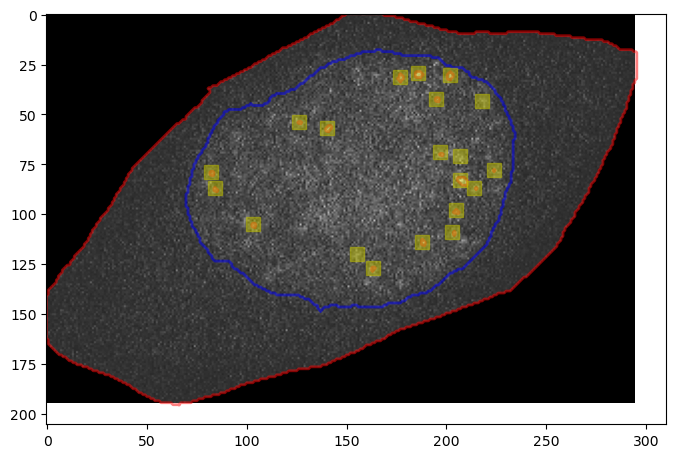

In [73]:
# Let's now look at individual cells in the image
# We will plot the detected spots of the selected cell using both particle finding approaches
img_spots_filtered_thresholded = img_spots_filtered.copy()
img_spots_filtered_thresholded[img_spots_filtered_thresholded<=0] = 0
img_spots_filtered_thresholded = 255*img_spots_filtered_thresholded/np.max(img_spots_filtered_thresholded)
spots_detected_dataframe = tp.locate(img_spots_filtered_thresholded, diameter=5, minmass=110) # "spots_detected_dataframe" is a pandas data frame that contains the information about the detected spots

cell_num = 7 # Choose which cell to look at
selected_cyto_mask = masks_cyto==cell_num
selected_nuc_mask = masks_nuc==nucleus_indices[cell_num]

# Crop the original image to show just the selected cell
image_cropped = img_cyto.copy()
image_cropped[~selected_cyto_mask] = 0

# remove rows and columns that are all zeros
rows = np.any(image_cropped[:,:,0], axis=1)
rlims = [np.min(np.where(rows)), np.max(np.where(rows))]
cols = np.any(image_cropped[:,:,0,], axis=0)
clims = [np.min(np.where(cols)), np.max(np.where(cols))]
image_cropped = image_cropped[rlims[0]:rlims[1], clims[0]:clims[1], :]

# display the cropped image
fig, ax = plt.subplots(1,1, figsize=(8, 8))
ax.imshow(image_cropped[:,:,1],cmap='gray')

# draw the contours of the cytosol and nucleus
cyto_contours = measure.find_contours(selected_cyto_mask, 0.5)
nuc_contours = measure.find_contours(selected_nuc_mask, 0.5)
for contour in cyto_contours:
    ax.plot(contour[:, 1]-clims[0], contour[:, 0]-rlims[0], linewidth=2, color='r', alpha=0.5)
for contour in nuc_contours:
    ax.plot(contour[:, 1]-clims[0], contour[:, 0]-rlims[0], linewidth=2, color='b', alpha=0.5)

# Add the contours where our first approach found particles in the image
for contour in spot_contours:
    # Check if the particle is in the selected cell
    posn = np.mean(contour, axis=0).astype(int)
    if selected_cyto_mask[posn[0], posn[1]]:
        ax.plot(contour[:, 1]-clims[0], contour[:, 0]-rlims[0], linewidth=2, color='r', alpha=0.5)

# Add red 'x' markers where trackpy found particles to the image
for i in range(len(spots_detected_dataframe)):
    # Check if the particle is in the selected cell
    posn = np.array([spots_detected_dataframe.y.values[i], spots_detected_dataframe.x.values[i]]).astype(int)
    if selected_cyto_mask[posn[0], posn[1]]:
        ax.plot(posn[1]-clims[0], posn[0]-rlims[0], 's', color='y', alpha=0.5, markersize=10)


In [74]:
# Lets now look at the detected spots individually to see which are found with both methods

# Create a matrix showing the distance between the spots detected by trackpy and the spots detected by the mask
dist_matrix = np.zeros((len(spots_detected_dataframe), len(spot_contours)))
for i in range(len(spots_detected_dataframe)):
    for j in range(len(spot_contours)):
        dist_matrix[i,j] = np.linalg.norm(np.array([spots_detected_dataframe.y.values[i], spots_detected_dataframe.x.values[i]]) - np.mean(spot_contours[j], axis=0))

maxDist = 10
indexList = []
while np.min(dist_matrix) < maxDist:
    # Find the shortest distance in the matrix and record the indexes
    indexes = np.unravel_index(np.argmin(dist_matrix, axis=None), dist_matrix.shape)
    indexList.append(indexes)
    # Set all entries in the row and column of the minimum distance to infinity
    dist_matrix[indexes[0],:] = np.inf
    dist_matrix[:,indexes[1]] = np.inf

print('Number of matches: ', len(indexList))
print('Number TrackPy Leftover: ', len(spots_detected_dataframe)-len(indexList))
print('Number Mask Leftover: ', len(spot_contours)-len(indexList))


Number of matches:  101
Number TrackPy Leftover:  16
Number Mask Leftover:  6


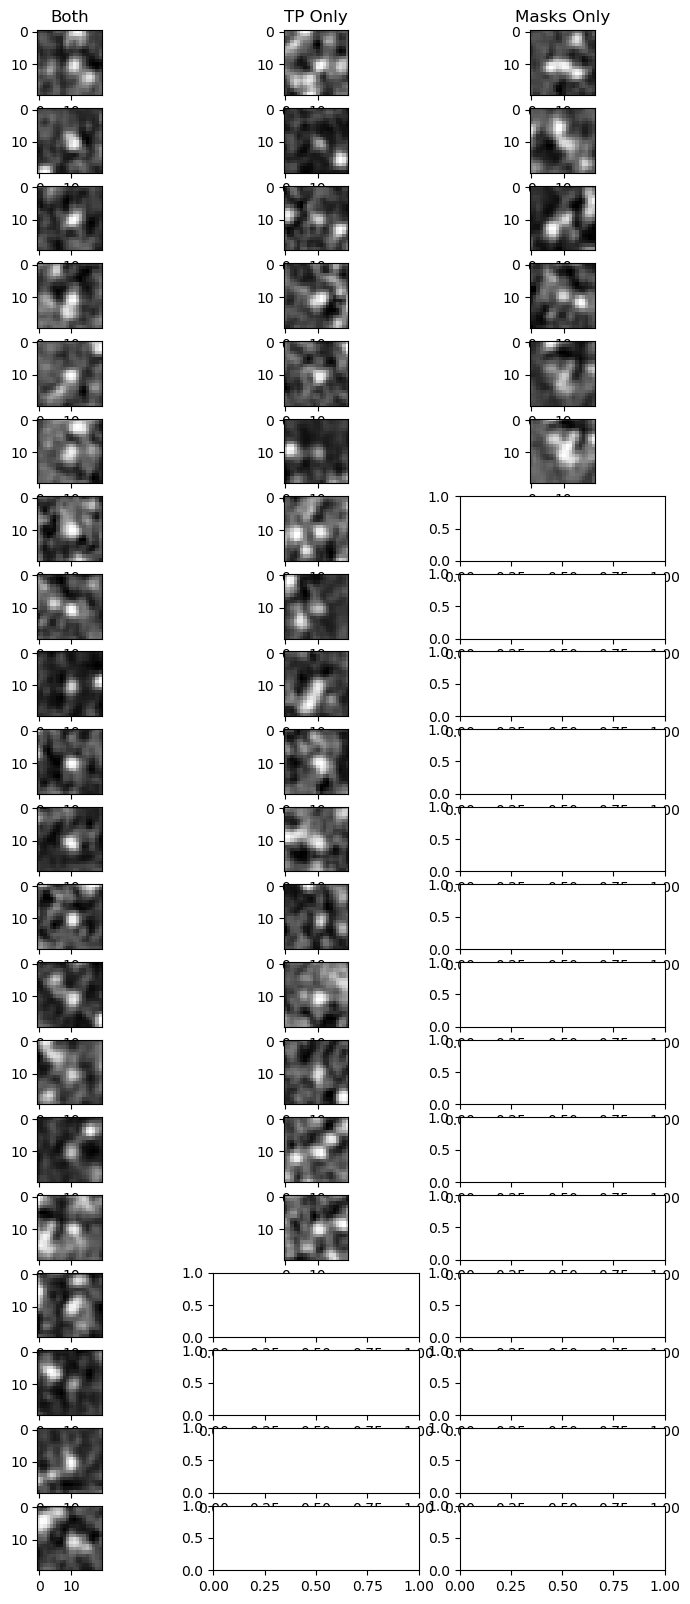

In [75]:
# Now let's look at the individual spots to see if we can determine which approach is better

# Create figure with three columns of 20 images
fig, ax = plt.subplots(20,3, figsize=(9, 20))
img_to_show = img_spots_filtered.copy()
# Loop through the first 20 matches, and make a plot for each
for i in range(20):
    # Plot the image
    posn = np.array([spots_detected_dataframe.y.values[indexList[i][0]], spots_detected_dataframe.x.values[indexList[i][0]]]).astype(int)
    ax[i,0].imshow(img_to_show[posn[0]-10:posn[0]+10,posn[1]-10:posn[1]+10],cmap='Greys_r')
    if i ==0:
        ax[i,0].set(title='Both')

# Loop through the first 20 spots detected onl by trackpy
trackPyLeftover = np.setdiff1d(np.arange(len(spots_detected_dataframe)), np.array(indexList)[:,0])
for j in range(min(20,len(trackPyLeftover))):
    i = trackPyLeftover[j]
    posn = np.array([spots_detected_dataframe.y.values[i], spots_detected_dataframe.x.values[i]]).astype(int)
    ax[j,1].imshow(img_to_show[posn[0]-10:posn[0]+10,posn[1]-10:posn[1]+10],cmap='Greys_r')
    if j ==0:
        ax[j,1].set(title='TP Only')

# Loop through the first 20 spots detected only by the mask
maskLeftover = np.setdiff1d(np.arange(len(spot_contours)), np.array(indexList)[:,1])
for j in range(min(20,len(maskLeftover))):
    i = maskLeftover[j]
    posn = np.mean(spot_contours[i], axis=0).astype(int)
    ax[j,2].imshow(img_to_show[posn[0]-10:posn[0]+10,posn[1]-10:posn[1]+10],cmap='Greys_r')
    if j ==0:
        ax[j,2].set(title='Masks Only')


- Spot detection using [Big-FISH](https://github.com/fish-quant/big-fish)
- Spot detection using [FISH Processing](https://colab.research.google.com/drive/1CQx4e5MQ0ZsZSQgqtLzVVh53dAg4uaQj?usp=sharing)

# References

*  Image downloaded from https://figshare.com from publication: "Forero-Quintero, Linda, William Raymond, Tetsuya Handa, Matthew Saxton, Tatsuya Morisaki, Hiroshi Kimura, Edouard Bertrand, Brian Munsky, and Timothy Stasevich. "Live-cell imaging reveals the spatiotemporal organization of endogenous RNA polymerase II phosphorylation at a single gene." (2020)."

* "Fox, Z.R., Fletcher, S., Fraisse, A., Aditya, C., Sosa-Carrillo, S., Gilles, S., Bertaux, F., Ruess, J. and Batt, G., 2021. MicroMator: Open and Flexible Software for Reactive Microscopy. bioRxiv. (2021)"